<a href="https://colab.research.google.com/github/hrushikeshsahu19/IPL-data-analysis/blob/main/Hrushikesh_Sahu_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
#import the library
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
teams_df = pd.read_csv(working_directory + 'teams.csv')

In [4]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [5]:
teams_df.describe()

,team1
count,15
unique,15
top,Rising Pune Supergiant
freq,1


In [6]:
teams_df.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [7]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


There are 15 teams in our Team data set they are as follows

# 1.Pune Warriors
# 2.Kochi Tuskers Kerala
# 3.Rajasthan Royals
# 4.Kochi Tuskers Kerala
#5.Gujarat Lions
#6.Chennai Super Kings
#7.Rising Pune Supergiants
#8.Delhi Daredevils
#9.Deccan Chargers
#10.Delhi Capitals
#11.Mumbai Indians
#12.Sunrisers Hyderabad
#13.Rising Pune Supergiant
#14.Royal Challengers Bangalore
#15.Kings XI Punjab

In [8]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
matches_df = pd.read_csv(working_directory + 'matches.csv')

In [9]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In our matches data set some null values in city , winner, player_of_match , venue ,umpire 1,umpire 2 and umpire 3 columns

In [11]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [12]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
len(matches_df['team1'].unique())

15

In [14]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
len(matches_df['team2'].unique())

15

In [30]:
list(matches_df['Season'].unique())

['IPL-2017',
 'IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2018',
 'IPL-2019']

This matches data set contain folling season of IPL match

1.IPL-2017

2.IPL-2008

3.IPL-2009

4.IPL-2010

5.IPL-2011

6.IPL-2012

7.IPL-2013

8.IPL-2014

9.IPL-2015

10.IPL-2016

11.IPL-2018

12.IPL-2019

Both team 1 and team 2 have 15 unique team

In [16]:
win_df=matches_df['winner'].value_counts().reset_index()

In [17]:
win_df.head()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82


In [18]:
win_df.tail()

,index,winner
10,Pune Warriors,12
11,Delhi Capitals,10
12,Rising Pune Supergiant,10
13,Kochi Tuskers Kerala,6
14,Rising Pune Supergiants,5


Text(0.5, 1.0, 'which teams win How much times')

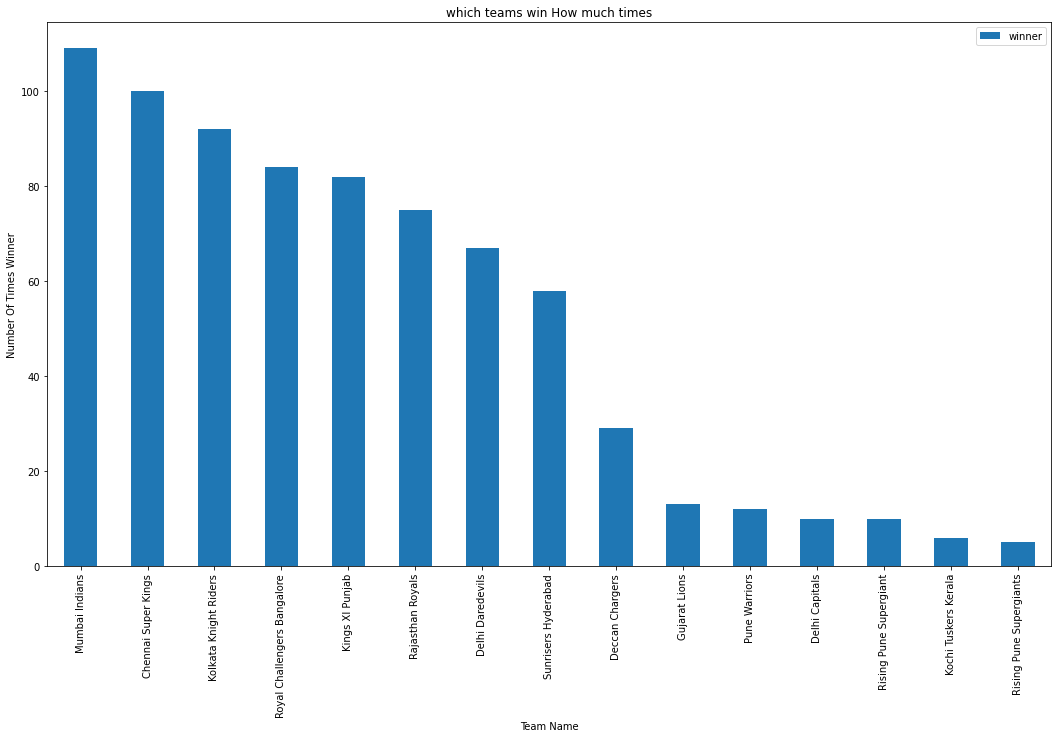

In [19]:
ax=win_df.plot(x='index',y='winner',kind='bar',figsize=(18,10))
ax.set_xlabel('Team Name')
ax.set_ylabel('Number Of Times Winner')
ax.set_title('which teams win How much times')


This graph shows that Mumbai indians team won the match highest numbers of time that is 109, chennai Super King won the match 2nd highest time that is 100 and Kolkata King Riders won the match 3rd highest time that is  92

This graph also shows that Rising Pune Supergiants won the match least number of times  that is 5,Kochi Tuskers Kerala won the match second  least number of times that is 6 and Delhi Capitals  and Rising Pune Supergiant won the match third  least number times that is 10

In [20]:
city_df=matches_df['city'].value_counts().reset_index()

In [21]:
city_df.head()

,index,city
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64


In [22]:
city_df.tail(10)

,index,city
22,Abu Dhabi,7
23,Cape Town,7
24,Raipur,6
25,Sharjah,6
26,Kochi,5
27,Kanpur,4
28,East London,3
29,Nagpur,3
30,Kimberley,3
31,Bloemfontein,2


Text(0.5, 1.0, ' City-match graph')

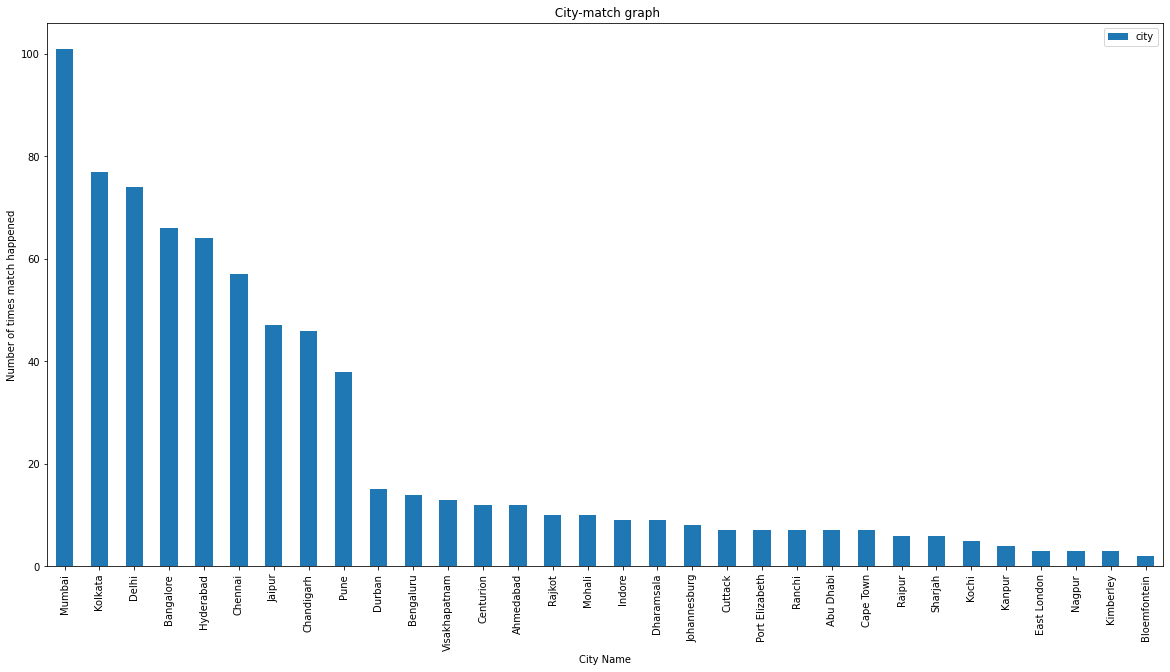

In [23]:
bx=city_df.plot(x='index',y='city',kind='bar',figsize=(20,10))
bx.set_xlabel('City Name')
bx.set_ylabel('Number of times match happened')
bx.set_title(' City-match graph')

This graph shows that most number IPL match are played in Mumbai City  that is that 101,second most match are played in Kolkata city that is 77 and third most match are played in Delhi city that is 74

This graph also shows that least number of IPL match are played in  Bloemfontein city that is 2 ,second least number of IPL match are played in Kimberley city,Nagpur city ,East London  City that is 3 and third least number of IPL match are played in Kanpur city that is 4

In [24]:
win_max_run=matches_df.groupby('winner')['win_by_runs'].max().reset_index()

In [25]:
win_max_wicket=matches_df.groupby('winner')['win_by_wickets'].max().reset_index()

In [37]:
win_run_wicket_df=win_max_run.merge(win_max_wicket,how='inner')

In [40]:
win_run_wicket_df

,winner,win_by_runs,win_by_wickets
0,Chennai Super Kings,97,10
1,Deccan Chargers,82,10
2,Delhi Capitals,39,7
3,Delhi Daredevils,97,10
4,Gujarat Lions,1,7
5,Kings XI Punjab,111,10
6,Kochi Tuskers Kerala,17,8
7,Kolkata Knight Riders,140,10
8,Mumbai Indians,146,10
9,Pune Warriors,38,7


Text(0.5, 1.0, 'Team win by maximum run and maximun wicket')

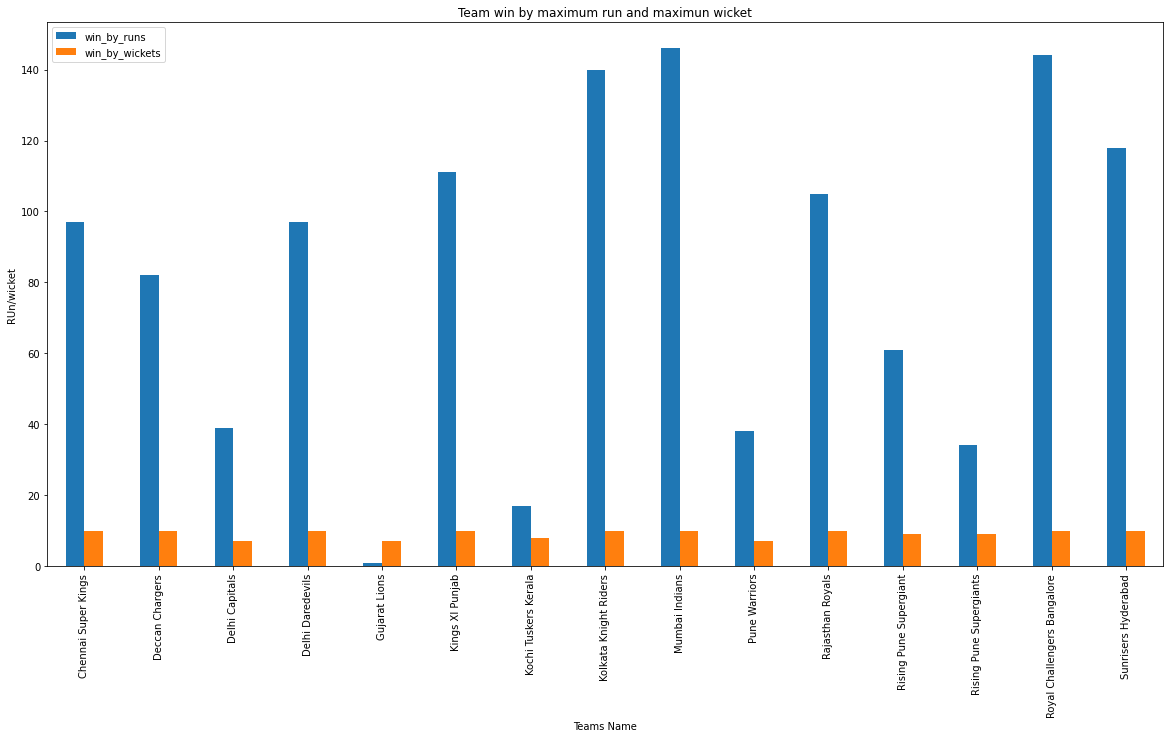

In [41]:
cx=win_run_wicket_df.plot(x='winner',y=['win_by_runs','win_by_wickets'],kind='bar',figsize=(20,10))
cx.set_xlabel('Teams Name')
cx.set_ylabel('RUn/wicket')
cx.set_title('Team win by maximum run and maximun wicket')

This graph shows that Mumbai Indians is own by highest run in IPL  and most of the teams won by 10 wicket in IPL data set

In [43]:
player_of_match_df=matches_df['player_of_match'].value_counts().reset_index()

In [44]:
player_of_match_df.head()

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17


Text(0.5, 1.0, 'player of the match ')

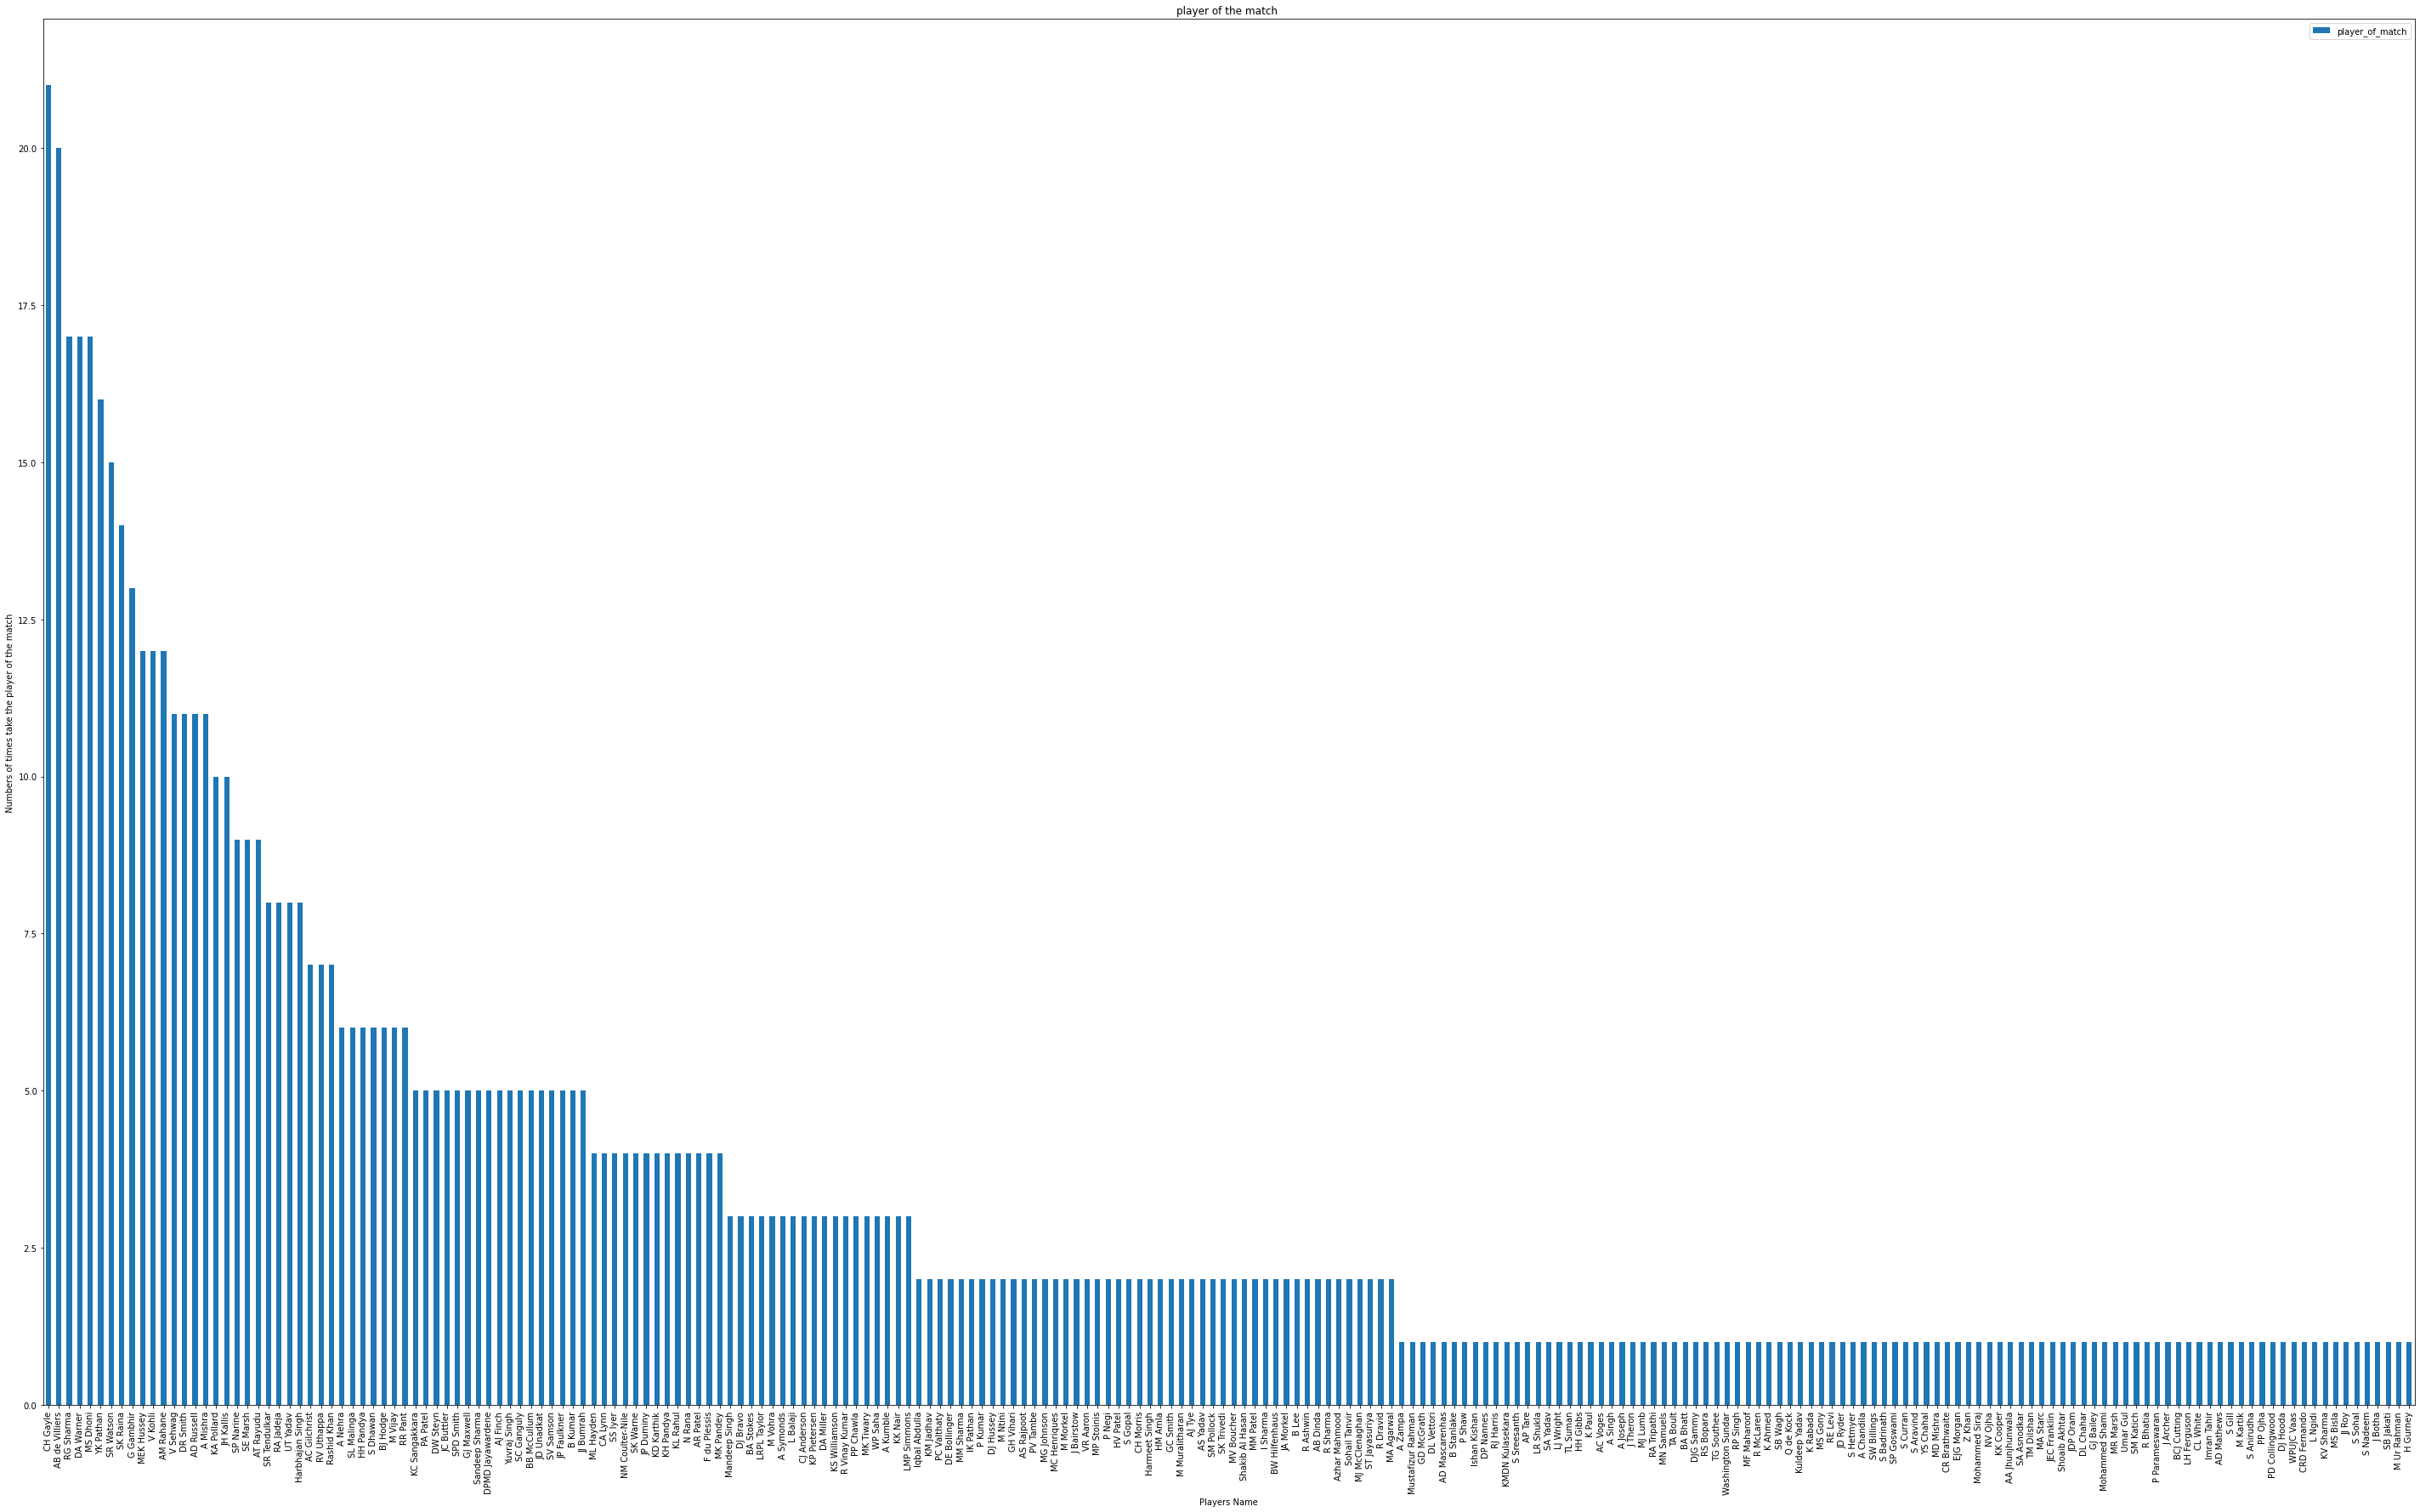

In [45]:
dx=player_of_match_df.plot(x='index',y='player_of_match',kind='bar',figsize=(50,30))
dx.set_xlabel('Players Name')
dx.set_ylabel('Numbers of times take the player of the match')
dx.set_title('player of the match ')

In [46]:
player_of_match_df.describe()

,player_of_match
count,226.000000
mean,3.327434
std,3.736766
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,21.000000


In [47]:
#find mean 
np.mean(player_of_match_df['player_of_match'])

3.327433628318584

In [48]:
#find the median
np.median(player_of_match_df['player_of_match'])

2.0

In [49]:
#find mode
statistics.mode(player_of_match_df['player_of_match'])

1

This graph shows that CH gayle have taken 21 times player of the match tropy,AB de Villiers have taken 20  times player of the trophy  and RG Sharma	,MS Dhoni	and DA Warner	 have taken 17 times player of the match

This graph looks likes positive skew distribution because most of values are lies in left part of our graph

positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode


negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode

In [50]:
match_win_df=matches_df.groupby(['team1','team2'])['winner'].count()

In [56]:
len(match_win_df)

139

In [59]:
match_win_df.head(60)

team1                 team2                      
Chennai Super Kings   Deccan Chargers                 8
                      Delhi Capitals                  1
                      Delhi Daredevils               12
                      Kings XI Punjab                11
                      Kochi Tuskers Kerala            2
                      Kolkata Knight Riders          12
                      Mumbai Indians                 12
                      Pune Warriors                   4
                      Rajasthan Royals               12
                      Royal Challengers Bangalore    10
                      Sunrisers Hyderabad             5
Deccan Chargers       Chennai Super Kings             2
                      Delhi Daredevils                8
                      Kings XI Punjab                 7
                      Kochi Tuskers Kerala            1
                      Kolkata Knight Riders           2
                      Mumbai Indians                  

In [60]:
match_win_df.tail(60)

team1                        team2                      
Mumbai Indians               Kolkata Knight Riders          11
                             Pune Warriors                   3
                             Rajasthan Royals               14
                             Rising Pune Supergiant          2
                             Rising Pune Supergiants         1
                             Royal Challengers Bangalore    13
                             Sunrisers Hyderabad             7
Pune Warriors                Chennai Super Kings             2
                             Deccan Chargers                 1
                             Delhi Daredevils                4
                             Kings XI Punjab                 4
                             Kolkata Knight Riders           2
                             Mumbai Indians                  3
                             Rajasthan Royals                3
                             Royal Challengers Bangalore     

The above data set gives when team1 match with team2 ,how many times team1 won the match

In [65]:
venue_df=matches_df['venue'].value_counts().reset_index()

In [64]:
venue_df

,index,venue
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [71]:
#load the data 
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [72]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
striker_df = pd.read_csv(working_directory + 'most_runs_average_strikerate.csv')

In [73]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
df = pd.read_csv(working_directory + 'teamwise_home_and_away.csv')